<a href="https://colab.research.google.com/github/JinHeeeKang/Playdata_Python/blob/master/0915.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN


In [ ]:
pip install tensorflow

In [ ]:
!nvidia-smi

Tue Sep 15 00:37:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
x_train[100]#0:검정 255:흰색

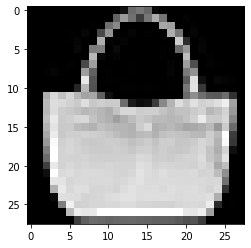

In [ ]:
plt.imshow(x_train[100],cmap='gray')

In [ ]:
#픽셀값을 0-1사이로 정규화
x_train,x_Test=x_train/255.0,x_test/255.0

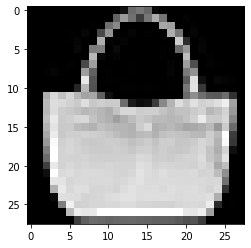

In [ ]:
plt.imshow(x_train[100],cmap='gray')#정규화 이후에도 똑같이 나옴 

In [ ]:
#Fully connected layer (Dense layer)의 한계- 데이터의 형상이 무시됨

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#28,28  데이터를
  tf.keras.layers.Dense(128, activation='relu'),#128개 Dense노드가 몇개 있는 신경망(레이어)
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델훈련
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2366 - accuracy: 0.6940
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5409 - accuracy: 0.8536
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4265 - accuracy: 0.8800
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8916
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3482 - accuracy: 0.9001


In [ ]:
#모델평가

model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
#fashion_mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

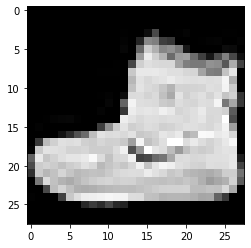

In [ ]:
plt.imshow(x_train[0],cmap='gray')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
# from tensorflow.keras import Flatten,Dense#
from tensorflow.keras import layers

In [ ]:
#     은닉
# ㅇ  ㅇ  ㅇ
# ㅇ  ㅇ  ㅇ
#     ㅇ
model= Sequential(
    [
    # input layer
    layers.Flatten(input_shape=(2,1)),#들어온 데이터를 쭉 펴는거(다차원->1차원)
    #hidden layer
    layers.Dense(3),#입출력을 모두 연결해주는 Dense 레이어
     #output
    layers.Dense(2)
    ]
)

In [ ]:
model

In [ ]:
model.build()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 8         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1= Sequential(
    [
    #layer1
    layers.Flatten(input_shape=(2,1)),
    #layer2
    layers.Dense(3,use_bias=False),
    layers.Dense(2)
    ])

In [ ]:
model1.build()
model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 6         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 8         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2= Sequential(
    [
    #layer1
    layers.Flatten(input_shape=(28,28)),
    #layer2
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])

In [ ]:
model2.build()
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2(x_train[0:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6141604e-03,
        0.0000000e+00, 4.4012041e-16, 5.9477769e-32, 0.0000000e+00,
        9.9538583e-01, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.4915935e-19,
        1.4546729e-33, 3.9932479e-16, 1.1967264e-27, 1.6356469e-38,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)>

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])#compile:신경망에 정의된 가중치를 바꿔가면 서 학습하는 과정 #optimizer:최저값을 찾기위해

In [ ]:
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5046 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5008 - accuracy: 0.8260
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4863 - accuracy: 0.8329
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4836 - accuracy: 0.8326
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4837 - accuracy: 0.8334


In [ ]:
import tensorflow as tf
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
mnist = tf.keras.datasets.mnist
(x_train_mnist,y_train_mnist),(x_test_mnist,y_test_mnist)=mnist.load_data()

In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0 #이미지데이터한정
x_train_mnist,x_test_mnist=x_train_mnist/255.0,x_test_mnist/255.0

In [ ]:
x_train.shape, x_train_mnist.shape

((50000, 32, 32, 3), (60000, 28, 28))

In [ ]:
x_train[100].shape

(32, 32, 3)

In [ ]:
x_train[100][:,:,0]# :,  0에서 끝까지

array([[0.83529412, 0.82745098, 0.82745098, ..., 0.59215686, 0.59215686,
        0.58431373],
       [0.83921569, 0.83137255, 0.83137255, ..., 0.59607843, 0.59607843,
        0.59215686],
       [0.84705882, 0.83921569, 0.83529412, ..., 0.6       , 0.6       ,
        0.59215686],
       ...,
       [0.56862745, 0.53333333, 0.56078431, ..., 0.84705882, 0.76862745,
        0.71764706],
       [0.54509804, 0.50588235, 0.50588235, ..., 0.89019608, 0.8745098 ,
        0.81960784],
       [0.5372549 , 0.56078431, 0.53333333, ..., 0.81960784, 0.85098039,
        0.89411765]])

In [ ]:
x_train[100][:,:,0].shape


(32, 32)

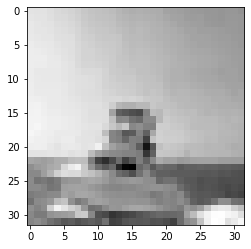

In [ ]:
plt.imshow(x_train[100][:,:,0],cmap='gray')

In [ ]:
model5= Sequential(
    [
    #layer1
    layers.Flatten(input_shape=(32,32,3)),
    #layer2
    layers.Dense(256,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
    ])

In [ ]:
model5.build()
model5.summary()

In [ ]:
model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model5.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4608 - accuracy: 0.4776
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4430 - accuracy: 0.4828
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4283 - accuracy: 0.4868
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4170 - accuracy: 0.4927
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4081 - accuracy: 0.4952
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3970 - accuracy: 0.4985
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3860 - accuracy: 0.5049
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3797 - accuracy: 0.5037
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3749 - accuracy: 0.5059
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.362

In [ ]:
#합성곱신경망
#cnn
#필터로 특징을 뽑아주는 컨볼루션(Convolution) 레이어


In [ ]:
model6= Sequential([
    #input layer
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
     
    #hidden layer
    #pooling
    layers.MaxPool2D((2,2)), # 필터랑 곱해서 새로운 행렬을 만들어 내는
    layers.Conv2D(64 ,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)), 
    layers.Conv2D(64 ,(3,3),activation='relu'),  
       
    #output layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
    ])

In [ ]:
model6.build()
model6.summary()
#conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496    = 32*64*9+64(32개 필터가64개로 올라가고, 3*3이라 9을 곱해줌. 각 선형의 필터값을 더해줌 )

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [ ]:
model6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model6.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5127 - accuracy: 0.4493
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1504 - accuracy: 0.5922
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0023 - accuracy: 0.6503
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8997 - accuracy: 0.6838
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8282 - accuracy: 0.7086


In [ ]:
model6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model6.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6577 - accuracy: 0.4036
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5525 - accuracy: 0.4427
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4783 - accuracy: 0.4705
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4181 - accuracy: 0.4935
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3734 - accuracy: 0.5100
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3337 - accuracy: 0.5231
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2971 - accuracy: 0.5391
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2693 - accuracy: 0.5480
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2403 - accuracy: 0.5588
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.217

In [ ]:
model6.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1851 - accuracy: 0.6110


[1.185062050819397, 0.6110000014305115]

In [ ]:
#dropout
강제로 노드를 학습에 참여 안시키는것
전체 개수중 확률적으로 랜덤

In [ ]:
#dropout 추가
model7= Sequential([
    #input layer
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
     
    #hidden layer
    #pooling
    layers.MaxPool2D((2,2)), # 필터랑 곱해서 새로운 행렬을 만들어 내는
    layers.Conv2D(64 ,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)), 
    layers.Conv2D(64 ,(3,3),activation='relu'),  
       
    #output layer
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
    ])

In [ ]:
model7.build()
model7.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [ ]:
model7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model7.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5368 - accuracy: 0.4349
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1718 - accuracy: 0.5829
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0253 - accuracy: 0.6388
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9420 - accuracy: 0.6672
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8778 - accuracy: 0.6943
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8288 - accuracy: 0.7091
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7856 - accuracy: 0.7244
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7475 - accuracy: 0.7379
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7132 - accuracy: 0.7500
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.677

In [ ]:
model7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model7.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9665 - accuracy: 0.6585 - val_loss: 0.9661 - val_accuracy: 0.6590
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8903 - accuracy: 0.6868 - val_loss: 0.8790 - val_accuracy: 0.6995
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8300 - accuracy: 0.7088 - val_loss: 0.8621 - val_accuracy: 0.7037
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7809 - accuracy: 0.7254 - val_loss: 0.8464 - val_accuracy: 0.7108
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7421 - accuracy: 0.7412 - val_loss: 0.8165 - val_accuracy: 0.7213
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7031 - accuracy: 0.7499 - val_loss: 0.7972 - val_accuracy: 0.7286
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6756 - accuracy: 0.7587 - val_loss: 0.8079 - val_accuracy:

In [ ]:
history.history

{'accuracy': [0.658519983291626,
  0.6868199706077576,
  0.7087799906730652,
  0.7253599762916565,
  0.741159975528717,
  0.7498999834060669,
  0.7586600184440613,
  0.7686799764633179,
  0.7783399820327759,
  0.7864199876785278],
 'loss': [0.9665150046348572,
  0.8903319239616394,
  0.8299970030784607,
  0.7809181809425354,
  0.7421030402183533,
  0.7030956745147705,
  0.6755799055099487,
  0.6476948857307434,
  0.6211510300636292,
  0.5981615781784058],
 'val_accuracy': [0.6589999794960022,
  0.6995000243186951,
  0.7037000060081482,
  0.7107999920845032,
  0.7213000059127808,
  0.728600025177002,
  0.7246999740600586,
  0.732200026512146,
  0.7275999784469604,
  0.7332000136375427],
 'val_loss': [0.9661399126052856,
  0.8789879679679871,
  0.8621052503585815,
  0.8463832139968872,
  0.8164595365524292,
  0.7972007393836975,
  0.8079022169113159,
  0.798515796661377,
  0.8046379089355469,
  0.7977636456489563]}

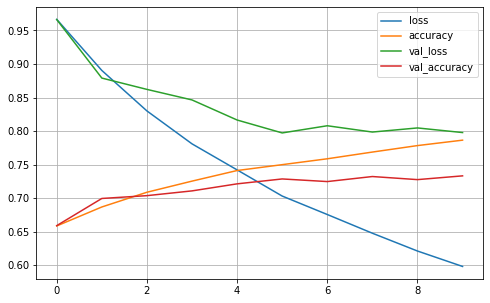

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
#모델 저장
model7.save('cifar10_model.h5')

In [ ]:
model_loaded=tf.keras.models.load_model('cifar10_model.h5')

In [ ]:
pred=model_loaded.predict(x_test)
pred

array([[3.6711511e-04, 4.2730963e-04, 1.8817016e-04, ..., 1.9722094e-04,
        8.2020334e-04, 5.7201838e-04],
       [6.1638657e-02, 6.5036930e-02, 1.0823967e-07, ..., 5.9888422e-10,
        8.7124580e-01, 2.0784247e-03],
       [1.3865140e-01, 1.9576294e-02, 8.9055218e-05, ..., 3.1326414e-05,
        8.2297540e-01, 1.8329069e-02],
       ...,
       [2.5676202e-06, 4.6650154e-08, 6.4351992e-04, ..., 2.0556289e-03,
        6.0858974e-07, 6.3562396e-07],
       [2.2379591e-04, 4.7716045e-01, 7.3632225e-03, ..., 3.9469564e-04,
        9.5914652e-07, 1.4988266e-04],
       [9.6681615e-13, 6.5199284e-14, 6.3756836e-08, ..., 9.9969506e-01,
        6.5644816e-12, 6.4464332e-12]], dtype=float32)

In [ ]:
model_loaded.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7978 - accuracy: 0.1051


[0.7977636456489563, 0.10509999841451645]